<a href="https://colab.research.google.com/github/mardycow/kaggle-house-prices-prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Загрузка данных

Для работы с этим ноутбуком нужны файлы `train.csv` и `test.csv` с соревнования Kaggle - https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques .

При работе в Colab достаточно перетащить файлы `train.csv` и `test.csv` в папку `/content`.

In [ ]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

## Импорт библиотек + обзор данных

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as lm

In [ ]:
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [ ]:
test_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


## baseline model


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error

In [ ]:
solution = pd.read_csv('solution.csv', index_col=0)
y_test = solution['SalePrice']

In [ ]:
X_train = train_data['GrLivArea'].copy()
y_train = train_data['SalePrice']
X_test  = test_data['GrLivArea'].copy()

In [ ]:
baseline_model = xgb.XGBRegressor(eval_metric='rmsle')

In [ ]:
param_grid = {"max_depth" : [4, 5, 6],
              "n_estimators" : [500, 600, 700],
              "learning_rate" : [0.01, 0.015]}
search = GridSearchCV(baseline_model, param_grid, cv=5).fit(X_train, y_train)

In [ ]:
print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}


In [ ]:
baseline_model = xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           eval_metric='rmsle')

baseline_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmsle', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
predictions = baseline_model.predict(X_test)

In [ ]:
RMSLE = np.sqrt(mean_squared_log_error(y_test, predictions))
print(f"The score is {RMSLE:.5f}")

The score is 0.29269


## numeric features model

In [ ]:
X_train = train_data.select_dtypes(include=['number']).copy()
X_train = X_train.drop(['SalePrice'], axis=1)
y_train = train_data['SalePrice']
X_test  = test_data.select_dtypes(include=['number']).copy()

In [ ]:
model = xgb.XGBRegressor(eval_metric='rmsle')

In [ ]:
param_grid = {"max_depth" : [4, 5, 6],
              "n_estimators" : [500, 600, 700],
              "learning_rate" : [0.01, 0.015]}
search = GridSearchCV(model, param_grid, cv=5).fit(X_train, y_train)
print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.015, 'max_depth': 5, 'n_estimators': 600}


In [ ]:
model = xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           eval_metric='rmsle')

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmsle', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.015, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=600, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
predictions = model.predict(X_test)
RMSLE = np.sqrt(mean_squared_log_error(y_test, predictions))
print(f"The score is {RMSLE:.5f}")

The score is 0.14168


In [ ]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,460,0,40,0,0,0,0,0,8,2007
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,500,349,0,0,0,0,0,0,2,2010
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,252,0,60,0,0,0,0,2500,5,2010


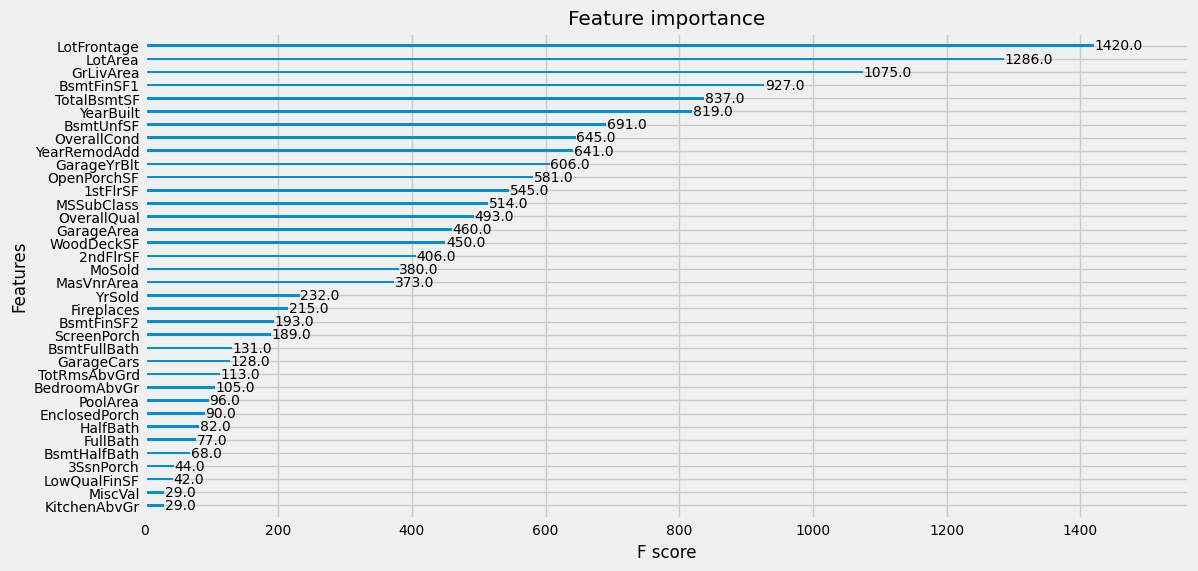

In [ ]:
from xgboost import plot_importance
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 10})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(model, max_num_features=36, ax=ax)
plt.show();

# EDA

## Работа с дубликатами

In [ ]:
print(f"Count of complete duplicates: {train_data.duplicated(keep='last').sum()}")

Count of complete duplicates: 0


In [ ]:
for feature in train_data.columns:
  counts = train_data[feature].value_counts(normalize=True)
  if len(counts) > 0 and counts.iloc[0] > 0.99:
    print(f"Column '{feature}' has more than 99% identical values: {counts.iloc[0]:.2%}")

Column 'Street' has more than 99% identical values: 99.59%
Column 'Utilities' has more than 99% identical values: 99.93%
Column 'PoolArea' has more than 99% identical values: 99.52%


In [ ]:
for feature in test_data.columns:
  counts = test_data[feature].value_counts(normalize=True)
  if len(counts) > 0 and counts.iloc[0] > 0.99:
    print(f"Column '{feature}' has more than 99% identical values: {counts.iloc[0]:.2%}")

Column 'Street' has more than 99% identical values: 99.59%
Column 'Utilities' has more than 99% identical values: 100.00%
Column 'Heating' has more than 99% identical values: 99.11%
Column 'LowQualFinSF' has more than 99% identical values: 99.04%
Column '3SsnPorch' has more than 99% identical values: 99.11%
Column 'PoolArea' has more than 99% identical values: 99.59%


Удалим столбцы 'Street' и 'Utilities' категориального типа, которые имееют более 99% одинаковых значений в данных.

Значения по признаку 'PoolArea' пока оставим для анализа влияния на целевую переменную.

In [ ]:
train_data = train_data.drop(['Street', 'Utilities'], axis=1)
test_data = test_data.drop(['Street', 'Utilities'], axis=1)

## Анализ и обработка пропусков

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Alley          91 non-null     object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyle    

In [ ]:
def miss_values(df):
  miss_values = df.isna().sum()
  return miss_values[miss_values > 0]

In [ ]:
miss_values = train_data.isna().sum()
mis_cols = miss_values[miss_values > 0]
mis_cols

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [ ]:
miss_values = test_data.isna().sum()
mis_cols = miss_values[miss_values > 0]
mis_cols

,0
MSZoning,4
LotFrontage,227
Alley,1352
Exterior1st,1
Exterior2nd,1
MasVnrType,894
MasVnrArea,15
BsmtQual,44
BsmtCond,45
BsmtExposure,44


### **MasVnrArea**

---



In [ ]:
train_data['MasVnrType'].value_counts(dropna=False)

,count
MasVnrType,
NaN,872
BrkFace,445
Stone,128
BrkCmn,15


In [ ]:
train_data[['MasVnrType', 'MasVnrArea']][train_data['MasVnrArea'].isna()]

,MasVnrType,MasVnrArea
Id,,
235,NaN,NaN
530,NaN,NaN
651,NaN,NaN
937,NaN,NaN
974,NaN,NaN
978,NaN,NaN
1244,NaN,NaN
1279,NaN,NaN


In [ ]:
train_data.loc[train_data['MasVnrArea'].isna(), 'MasVnrArea'] = 0.0

In [ ]:
test_data[['MasVnrType', 'MasVnrArea']][test_data['MasVnrArea'].isna()]

,MasVnrType,MasVnrArea
Id,,
1692,NaN,NaN
1707,NaN,NaN
1883,NaN,NaN
1993,NaN,NaN
2005,NaN,NaN
2042,NaN,NaN
2312,NaN,NaN
2326,NaN,NaN
2341,NaN,NaN


In [ ]:
test_data.loc[test_data['MasVnrArea'].isna(), 'MasVnrArea'] = 0.0

In [ ]:
test_data[['MasVnrType', 'MasVnrArea']][test_data['MasVnrArea'].isna()]

,MasVnrType,MasVnrArea
Id,,


### **Electrical**


---



In [ ]:
train_data['Electrical'].value_counts(dropna=False)

,count
Electrical,
SBrkr,1334
FuseA,94
FuseF,27
FuseP,3
Mix,1
NaN,1


In [ ]:
train_data['Electrical'][train_data['Electrical'].isna()]

,Electrical
Id,
1380,NaN


In [ ]:
train_data.groupby('Electrical')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
Electrical,,,,,,,,
FuseA,94.0,122196.893617,37511.376615,34900.0,98500.0,121250.0,143531.25,239000.0
FuseF,27.0,107675.444444,30636.507376,39300.0,88500.0,115000.0,129950.00,169500.0
FuseP,3.0,97333.333333,34645.827070,73000.0,77500.0,82000.0,109500.00,137000.0
Mix,1.0,67000.000000,NaN,67000.0,67000.0,67000.0,67000.00,67000.0
SBrkr,1334.0,186825.113193,79856.458326,37900.0,134575.0,170000.0,220750.00,755000.0


In [ ]:
print(train_data['SalePrice'][1380])

167500


In [ ]:
train_data.loc[train_data['Electrical'].isna(), 'Electrical'] = 'SBrkr'

In [ ]:
train_data['Electrical'][train_data['Electrical'].isna()]

,Electrical
Id,




---

### **Замена** пропусков на **категориальные значения** (NA, None и т.д.) согласно data_description.txt (Kaggle)

---



In [ ]:
convert_dict = {'MasVnrType' : 'None',
                'BsmtQual' : 'NA',
                'Alley' : 'NA',
                'BsmtCond' : 'NA',
                'BsmtExposure' : 'NA',
                'BsmtFinType1' : 'NA',
                'BsmtFinType2' : 'NA',
                'FireplaceQu' : 'NA',
                'GarageType' : 'NA',
                'GarageFinish' : 'NA',
                'GarageQual' : 'NA',
                'GarageCond' : 'NA',
                'PoolQC' : 'NA',
                'Fence' : 'NA',
                'MiscFeature' : 'NA'}

def nan_convert(df, convert_dict):
  for col, category in convert_dict.items():
    df.loc[:, col] = df.loc[:, col].fillna(category)
  return df

In [ ]:
nan_convert(train_data, convert_dict)
nan_convert(test_data, convert_dict)

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,NA,Reg,Lvl,Inside,Gtl,NAmes,...,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,NA,IR1,Lvl,Corner,Gtl,NAmes,...,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,NA,IR1,Lvl,Inside,Gtl,Gilbert,...,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,NA,IR1,Lvl,Inside,Gtl,Gilbert,...,0,0,NA,NA,NA,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,NA,IR1,HLS,Inside,Gtl,StoneBr,...,144,0,NA,NA,NA,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,NA,Reg,Lvl,Inside,Gtl,MeadowV,...,0,0,NA,NA,NA,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,NA,Reg,Lvl,Inside,Gtl,MeadowV,...,0,0,NA,NA,NA,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,NA,Reg,Lvl,Inside,Gtl,Mitchel,...,0,0,NA,NA,NA,0,9,2006,WD,Abnorml


In [ ]:
miss_values = test_data.isna().sum()
mis_cols = miss_values[miss_values > 0]
mis_cols

,0
MSZoning,4
LotFrontage,227
Exterior1st,1
Exterior2nd,1
BsmtFinSF1,1
BsmtFinSF2,1
BsmtUnfSF,1
TotalBsmtSF,1
BsmtFullBath,2
BsmtHalfBath,2




---


### **GarageYrBlt, GarageCars, GarageArea**

---



In [ ]:
test_data[['GarageCars', 'GarageArea', 'GarageType', 'GarageYrBlt']][test_data['GarageArea'].isna()]

,GarageCars,GarageArea,GarageType,GarageYrBlt
Id,,,,
2577,NaN,NaN,Detchd,NaN


In [ ]:
test_data.groupby('GarageType')[['GarageCars', 'GarageArea', 'GarageYrBlt']].describe()

GarageCars                                                \
                count      mean       std  min  25%  50%   75%  max   
GarageType                                                            
2Types           17.0  2.647059  0.785905  1.0  2.0  3.0  3.00  4.0   
Attchd          853.0  1.953107  0.633683  1.0  2.0  2.0  2.00  4.0   
Basment          17.0  1.529412  0.514496  1.0  1.0  2.0  2.00  2.0   
BuiltIn          98.0  2.397959  0.714212  1.0  2.0  2.0  3.00  4.0   
CarPort           6.0  1.500000  0.836660  1.0  1.0  1.0  1.75  3.0   
Detchd          391.0  1.519182  0.562973  1.0  1.0  1.0  2.00  5.0   
NA               76.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0   

           GarageArea              ...                 GarageYrBlt  \
                count        mean  ...     75%     max       count   
GarageType                         ...                               
2Types           17.0  732.823529  ...  850.00  1041.0        17.0   
Attchd          853.0  527.256741  ...  600.00  1348.0       853.0   
Basment          17.0  419.647059  ...  525.00   626.0        17.0   
BuiltIn          98.0  578.173469  ...  729.75  1200.0        98.0   
CarPort           6.0  353.833333  ...  400.75   530.0         6.0   
Detchd          391.0  412.202046  ...  528.00  1488.0       390.0   
NA               76.0    0.000000  ...    0.00     0.0         0.0   

                                                                            
                   mean        std     min     25%     50%     75%     max  
GarageType                                                                  
2Types      1964.352941  19.729233  1928.0  1953.0  1968.0  1976.0  2000.0  
Attchd      1984.420868  22.209098  1900.0  1967.0  1991.0  2004.0  2207.0  
Basment     1963.882353  27.029804  1900.0  1954.0  1960.0  1978.0  2005.0  
BuiltIn     1997.408163  15.895170  1920.0  1999.0  2003.0  2005.0  2007.0  
CarPort     1955.000000  19.297668  1920.0  1949.5  1962.0  1968.5  1970.0  
Detchd      1959.656410  27.144001  1895.0  1939.0  1959.0  1979.0  2008.0  
NA                  NaN        NaN     NaN     NaN     NaN     NaN     NaN  

[7 rows x 24 columns]

In [ ]:
test_data.loc[test_data['GarageCars'].isna(), 'GarageCars'] = test_data['GarageCars'][test_data['GarageType'] == 'Detchd'].median()
test_data.loc[test_data['GarageArea'].isna(), 'GarageArea'] = test_data['GarageArea'][test_data['GarageType'] == 'Detchd'].median()

In [ ]:
test_data.loc[(test_data['GarageYrBlt'].isna()) & (test_data['GarageType'] == 'Detchd'), 'GarageYrBlt'] = test_data['GarageYrBlt'][test_data['GarageType'] == 'Detchd'].median()

## Анализ целевой переменной

In [ ]:
train_data['SalePrice'].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


<Axes: ylabel='SalePrice'>

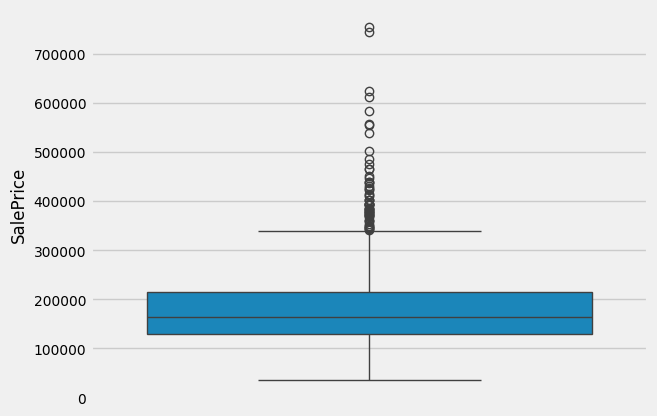

In [ ]:
sns.boxplot(train_data['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

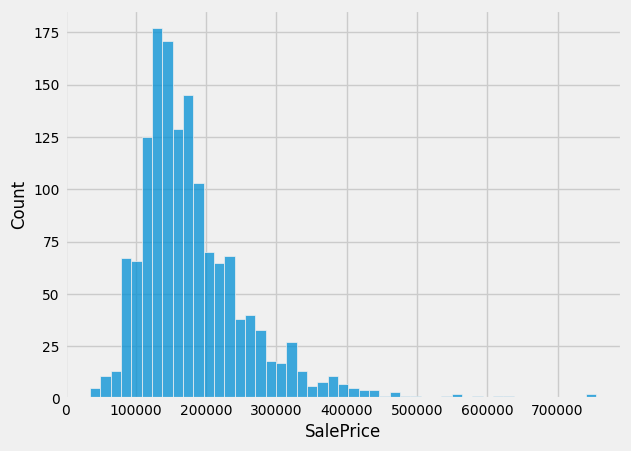

In [ ]:
sns.histplot(train_data['SalePrice'])

### Проверка нормальности по критерию Шапиро-Уилка

Т.к в выборке до 5000 наблюдений мы можем воспользоваться данным критерием


---
**Гипотеза H0:** Целевой показатель SalePrice соответствует нормальному распределению


---




In [ ]:
stats.shapiro(train_data['SalePrice'])

ShapiroResult(statistic=np.float64(0.8696714665902145), pvalue=np.float64(3.2061412312021656e-33))



---
**Вывод:** Значение p-value < 0.05 (уровень значимости), то гипотеза H0 отклоняется


---



Типы данных в наборе:

**Количественные (36)** - MSSubClass (можно рассматривать категориально), LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, ~~BsmtFullBath, BsmtHalfBath, FullBath, HalfBath~~ (new TotalBths), Bedroom, Kitchen, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold;

**Категориальные (43)** - MSZoning, ~~Street~~, Alley, LotShape, LandContour, ~~Utilities~~, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition

## Сравнение групп (влияние категориальных признаков на целевую переменную)



### **Neighborhood**






---
**Гипотеза H0:** Статистически значимые отличия в группах Neighborhood отсутствуют


---

In [ ]:
train_data.groupby('Neighborhood')[['SalePrice']].mean()

,SalePrice
Neighborhood,
Blmngtn,194870.882353
Blueste,137500.000000
BrDale,104493.750000
BrkSide,124834.051724
ClearCr,212565.428571
CollgCr,197965.773333
Crawfor,210624.725490
Edwards,128219.700000
Gilbert,192854.506329


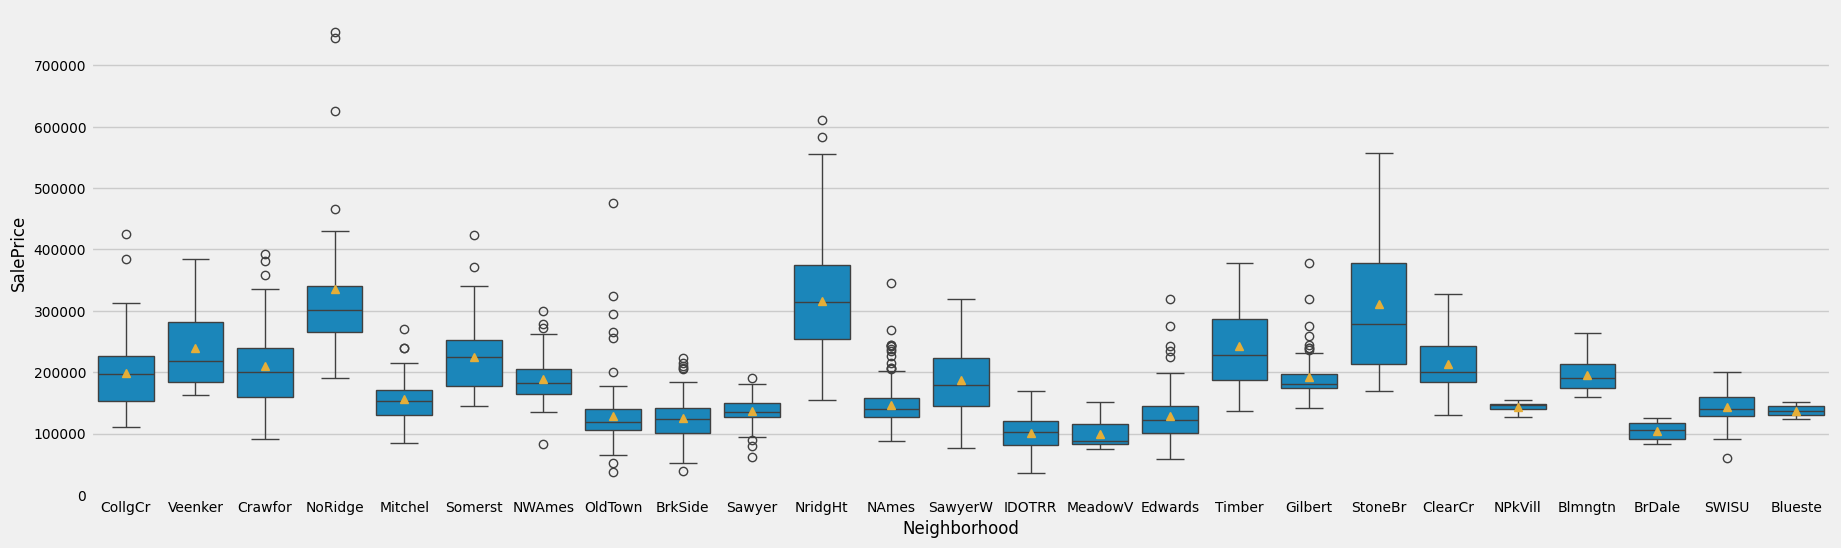

In [ ]:
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x='Neighborhood', y='SalePrice', data=train_data, showmeans=True)

In [ ]:
#Проверка выборок на нормальное рапсределение для выбора подходящего критерия сравнения
for i in train_data['Neighborhood'].unique():
    result = stats.anderson(train_data[train_data['Neighborhood'] == i]['SalePrice'])
    if result.statistic > result.critical_values[2]:
        print(f'Выборка по категории {i} не соответствует нормальному распределению')

Выборка по категории CollgCr не соответствует нормальному распределению
Выборка по категории Crawfor не соответствует нормальному распределению
Выборка по категории NoRidge не соответствует нормальному распределению
Выборка по категории Mitchel не соответствует нормальному распределению
Выборка по категории Somerst не соответствует нормальному распределению
Выборка по категории NWAmes не соответствует нормальному распределению
Выборка по категории OldTown не соответствует нормальному распределению
Выборка по категории BrkSide не соответствует нормальному распределению
Выборка по категории Sawyer не соответствует нормальному распределению
Выборка по категории NAmes не соответствует нормальному распределению
Выборка по категории MeadowV не соответствует нормальному распределению
Выборка по категории Edwards не соответствует нормальному распределению
Выборка по категории Gilbert не соответствует нормальному распределению
Выборка по категории Blueste не соответствует нормальному распределе

In [ ]:
#Поскольку есть выборки, которые не соответствуют нормальному рапсределению -> выбираем непараметричсекий критерий
#Выборки независимы и их более 2х -> воспользуемся критерияем Краскала-Уоллиса

In [ ]:
grouped_data = [group['SalePrice'].values for name, group in train_data.groupby('Neighborhood')]
kruskal_statistic, p_value = stats.mstats.kruskalwallis(*grouped_data)
print(f'Критерий Краскала-Уоллиса: {kruskal_statistic}, p-value: {p_value}')

Критерий Краскала-Уоллиса: 868.5323758806298, p-value: 6.696799031735812e-168



---
**Вывод:** Значение p-value < 0.05 (уровень значимости), то гипотеза H0 отклоняется, то есть статистически значимые отличия присутствуют -> признак Neighborhood оказывает влияние на целевой показатель SalePrice


---

### **PoolQC**


---
**Гипотеза H0:** Статистически значимые отличия в группах PoolQC отсутствуют


---

In [ ]:
train_data.groupby('PoolQC')[['SalePrice']].describe()

SalePrice                                                              \
           count           mean            std       min       25%       50%   
PoolQC                                                                         
Ex           2.0  490000.000000  360624.458405  235000.0  362500.0  490000.0   
Fa           2.0  215500.000000   48790.367902  181000.0  198250.0  215500.0   
Gd           3.0  201990.000000   63441.392639  160000.0  165500.0  171000.0   
NA        1453.0  180404.663455   78168.872519   34900.0  129900.0  162900.0   

                            
             75%       max  
PoolQC                      
Ex      617500.0  745000.0  
Fa      232750.0  250000.0  
Gd      222985.0  274970.0  
NA      213500.0  755000.0

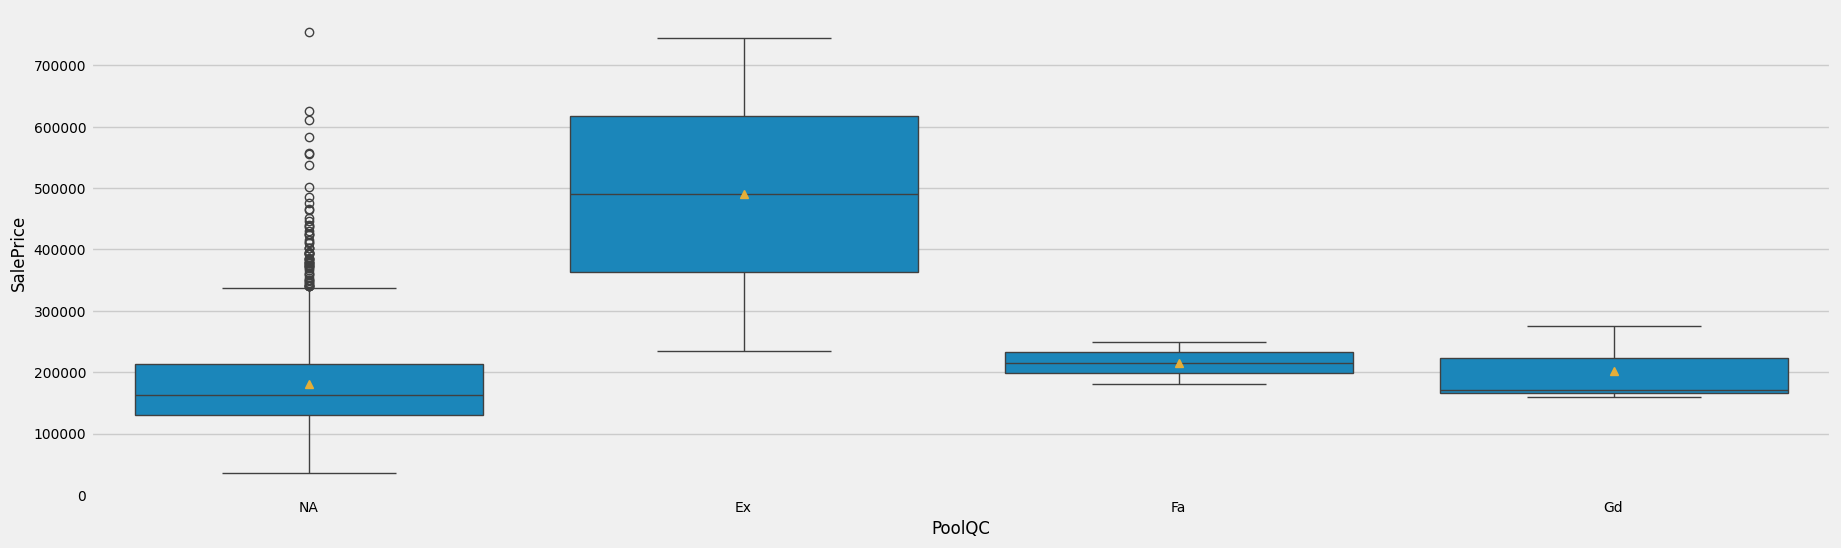

In [ ]:
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x='PoolQC', y='SalePrice', data=train_data, showmeans=True)

In [ ]:
for i in train_data['PoolQC'].unique():
    result = stats.anderson(train_data[train_data['PoolQC'] == i]['SalePrice'])
    if result.statistic > result.critical_values[2]:
        print(f'Выборка по категории {i} не соответствует нормальному распределению')

Выборка по категории NA не соответствует нормальному распределению
Выборка по категории Ex не соответствует нормальному распределению
Выборка по категории Fa не соответствует нормальному распределению
Выборка по категории Gd не соответствует нормальному распределению


In [ ]:
grouped_data = [group['SalePrice'].values for name, group in train_data.groupby('PoolQC')]
kruskal_statistic, p_value = stats.mstats.kruskalwallis(*grouped_data)
print(f'Критерий Краскала-Уоллиса: {kruskal_statistic}, p-value: {p_value}')

Критерий Краскала-Уоллиса: 5.995693231359807, p-value: 0.11181994685528329



---
**Вывод:** Значение p-value > 0.05 (уровень значимости), то гипотеза H0 принимается, то есть статистически значимые отличия отсутствуют -> признак PoolQC не оказывает влияния на целевой показатель SalePrice


---

### **LandSlope**


---
**Гипотеза H0:** Статистически значимые отличия в группах LandSlope отсутствуют


---

In [ ]:
train_data.groupby('LandSlope')[['SalePrice']].mean()

,SalePrice
LandSlope,
Gtl,179956.799566
Mod,196734.138462
Sev,204379.230769


In [ ]:
for i in train_data['LandSlope'].unique():
    result = stats.anderson(train_data[train_data['LandSlope'] == i]['SalePrice'])
    if result.statistic > result.critical_values[2]:
        print(f'Выборка по категории {i} не соответствует нормальному распределению')

Выборка по категории Gtl не соответствует нормальному распределению
Выборка по категории Mod не соответствует нормальному распределению


In [ ]:
grouped_data = [group['SalePrice'].values for name, group in train_data.groupby('LandSlope')]
kruskal_statistic, p_value = stats.mstats.kruskalwallis(*grouped_data)
print(f'Критерий Краскала-Уоллиса: {kruskal_statistic}, p-value: {p_value}')

Критерий Краскала-Уоллиса: 3.9388371382859146, p-value: 0.1395379643115706



---
**Вывод:** Значение p-value > 0.05 (уровень значимости), то гипотеза H0 принимается, то есть статистически значимые отличия отсутствуют -> признак LandSlope не оказывает влияния на целевой показатель SalePrice


---

### **CentralAir**


---
**Гипотеза H0:** Статистически значимые отличия в группах CentralAir отсутствуют


---

In [ ]:
train_data.groupby('CentralAir')[['SalePrice']].describe()

SalePrice                                                  \
               count           mean           std      min       25%   
CentralAir                                                             
N               95.0  105264.073684  40671.273961  34900.0   82000.0   
Y             1365.0  186186.709890  78805.206820  52000.0  134800.0   

                                          
                 50%       75%       max  
CentralAir                                
N            98000.0  128500.0  265979.0  
Y           168000.0  219210.0  755000.0

In [ ]:
for i in train_data['CentralAir'].unique():
    result = stats.shapiro(train_data[train_data['CentralAir'] == i]['SalePrice'])
    if result.pvalue < 0.05:
        print(f'Выборка по категории {i} не соответствует нормальному распределению')

Выборка по категории Y не соответствует нормальному распределению
Выборка по категории N не соответствует нормальному распределению


In [ ]:
#Поскольку есть выборки, которые не соответствуют нормальному рапсределению -> выбираем непараметричсекий критерий
#Выборки независимы и их 2 -> воспользуемся критерияем Манна-Уитни

In [ ]:
grouped_data = [group['SalePrice'].values for name, group in train_data.groupby('CentralAir')]
kruskal_statistic, p_value = scipy.stats.mannwhitneyu(*grouped_data)
print(f'Критерий Манна-Уитни: {kruskal_statistic}, p-value: {p_value}')

Критерий Манна-Уитни: 17290.0, p-value: 5.3277134372271244e-33



---
**Вывод:** Значение p-value < 0.05 (уровень значимости), то гипотеза H0 отклоняется, то есть статистически значимые отличия присутствуют -> признак CentralAir оказывает влияние на целевой показатель SalePrice


---

## Корреляционный анализ количественных и порядковых признаков

In [ ]:
num = ['SalePrice', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'PoolArea', 'TotRmsAbvGrd', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'GarageCars', 'GrLivArea', 'GarageYrBlt']

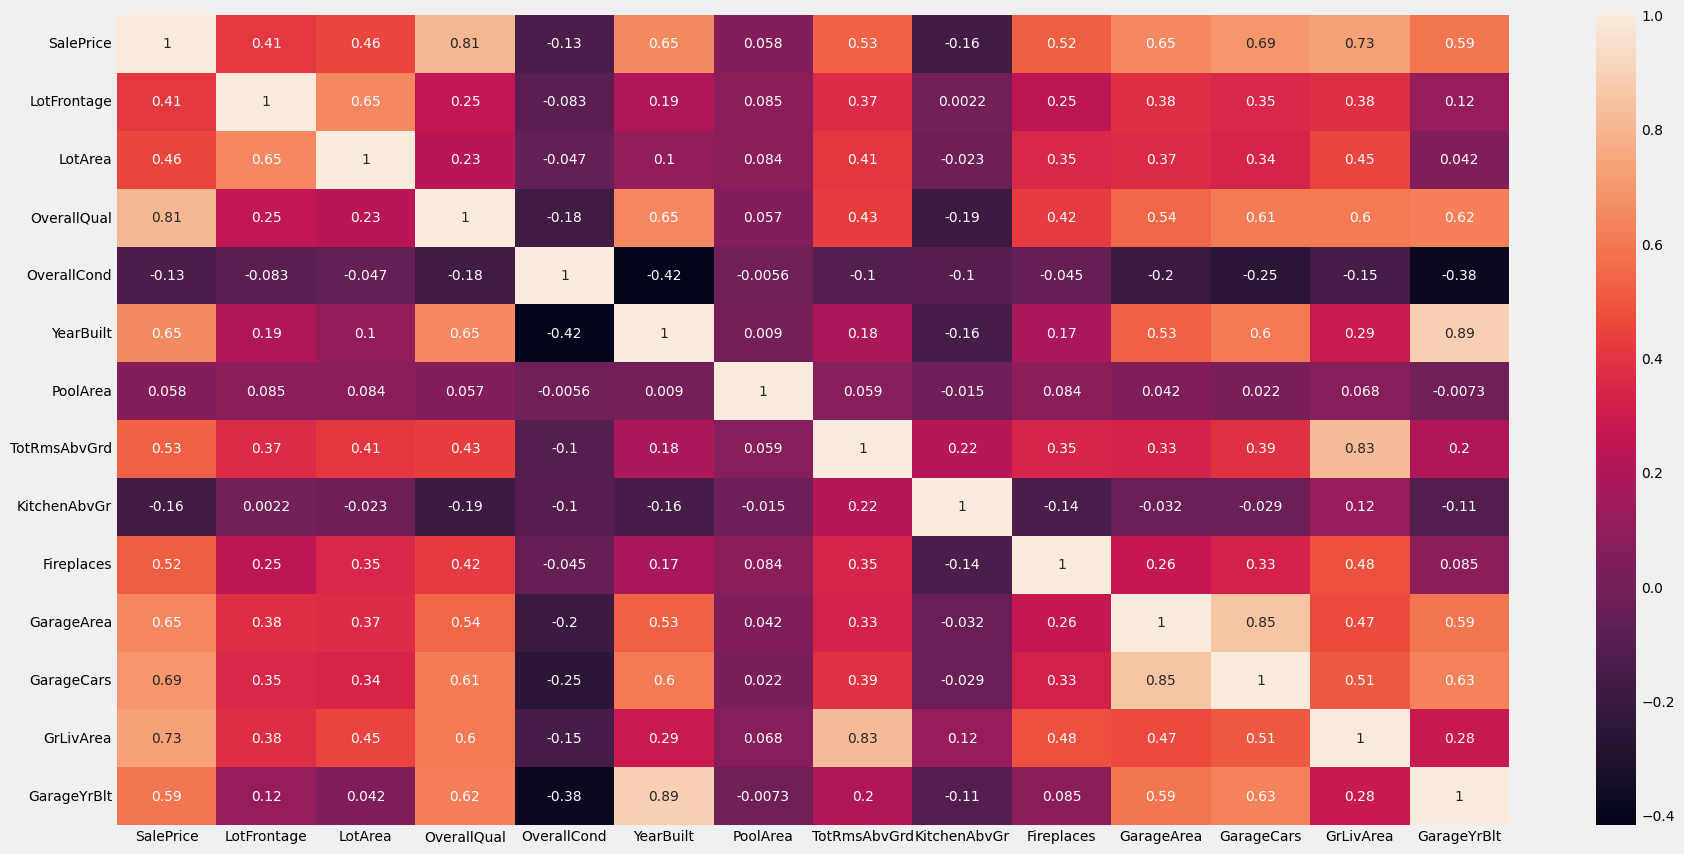

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
hm = sns.heatmap(train_data[num].corr(method = 'spearman'),annot=True)

(прим. для построения других моделей можно рассмотреть возможность удаления одного признаков высоко коррелированных друг с другом (GarageArea, Garage Cars), (GrLivArea, TotRmsAbvGr)

# Feature Engineering

In [ ]:
train_data['is_train'] = 1
test_data['is_train'] = 0
train_data.drop(['SalePrice'], axis=1, inplace=True)
combined_df = pd.concat([train_data, test_data], sort=False)

In [ ]:
combined_df.drop(['PoolQC', 'LandSlope'], axis=1, inplace=True)

## TotalBaths

In [ ]:
combined_df['TotalBaths'] = combined_df['BsmtFullBath'] + combined_df['FullBath'] + (combined_df['BsmtHalfBath']*0.5) + (combined_df['HalfBath']*0.5)

In [ ]:
combined_df.drop(['BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath'], axis=1, inplace=True)

## TotalArea (BsmtLivArea)

In [ ]:
combined_df['BsmtLivArea'] = combined_df['GrLivArea'] + combined_df['TotalBsmtSF']

In [ ]:
combined_df.drop(['GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)

## Преобразование в порядковый тип (BsmtCond, BsmtQual и т.д)

Аналогично признакам OverallQual и OverallCond можно рассмотреть преобразование BsmtCond, BsmtQual, FireplaceQu, GarageQual, GarageCond, HeatingQC, ExterQual, ExterCond в порядковый тип, тк значения могут быть рассмотрены упорядоченно.

In [ ]:
quality_order = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'NA': 0
}

cols = ['BsmtCond', 'BsmtQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'HeatingQC', 'ExterQual', 'ExterCond', 'KitchenQual']

combined_df[cols] = combined_df[cols].replace(quality_order)

<ipython-input-77-f654b977be63>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_df[cols] = combined_df[cols].replace(quality_order)


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Alley          2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   LotConfig      2919 non-null   object 
 8   Neighborhood   2919 non-null   object 
 9   Condition1     2919 non-null   object 
 10  Condition2     2919 non-null   object 
 11  BldgType       2919 non-null   object 
 12  HouseStyle     2919 non-null   object 
 13  OverallQual    2919 non-null   int64  
 14  OverallCond    2919 non-null   int64  
 15  YearBuilt      2919 non-null   int64  
 16  YearRemodAdd   2919 non-null   int64  
 17  RoofStyle      2919 non-null   object 
 18  RoofMatl     

## One-hot Encoding

In [ ]:
all = pd.get_dummies(combined_df)


In [ ]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Columns: 251 entries, MSSubClass to SaleCondition_Partial
dtypes: bool(209), float64(11), int64(31)
memory usage: 1.5 MB


# Обучение и оценка

In [ ]:
numeric_train = all[all['is_train'] == 1].drop(columns=['is_train'])
numeric_test = all[all['is_train'] == 0].drop(columns=['is_train'])

In [ ]:
y_train

,SalePrice
Id,
1,208500
2,181500
3,223500
4,140000
5,250000
...,...
1456,175000
1457,210000
1458,266500


In [ ]:
X_train_2 = numeric_train.copy()
X_test_2 = numeric_test.copy()

In [ ]:
model_2 = xgb.XGBRegressor(eval_metric='rmsle')

In [ ]:
param_grid = {"max_depth" : [3, 4, 5],
              "n_estimators" : [1000, 2000],
              "learning_rate" : [0.01, 0.015]}
search = GridSearchCV(model_2, param_grid, cv=5).fit(X_train_2, y_train)
print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.015, 'max_depth': 3, 'n_estimators': 2000}


In [ ]:
model_2 = xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           eval_metric='rmsle')

model_2.fit(X_train_2, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmsle', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.015, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
predictions = model_2.predict(X_test_2)
RMSLE = np.sqrt(mean_squared_log_error(y_test, predictions))
print(f"The score is {RMSLE:.5f}")

The score is 0.13096
